Mounted at /content/drive
GDP Data columns: Index(['Year - Month', 'Monthly Real GDP Index'], dtype='object')
Unemployment Data columns: Index(['DATE', 'UNRATE'], dtype='object')


<ipython-input-1-f7f2a74f0afd>:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
<ipython-input-1-f7f2a74f0afd>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)


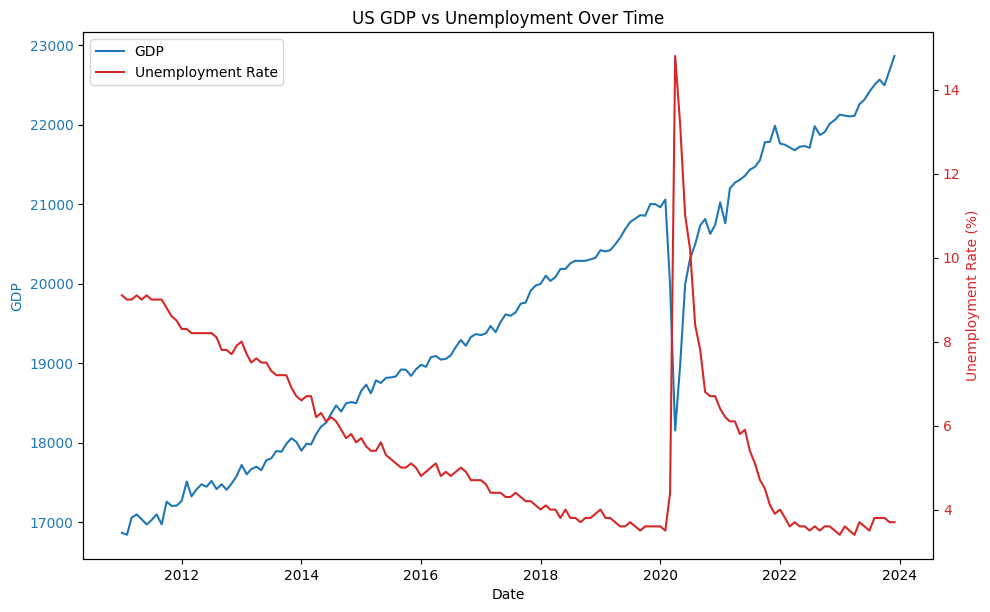

In [ ]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the data
gdp_data = pd.read_csv('/content/drive/MyDrive/CS418_Project_Pratik/data/USMonthlyGDP-2011-2023.csv')
unemployment_data = pd.read_csv('/content/drive/MyDrive/CS418_Project_Pratik/data/UnemploymentRate2011-2023.csv')

# Print the column names to check
print("GDP Data columns:", gdp_data.columns)
print("Unemployment Data columns:", unemployment_data.columns)

# Define date columns
gdp_date_column = 'Year - Month'
unemployment_date_column = 'DATE'

# Convert date columns to datetime format
gdp_data[gdp_date_column] = pd.to_datetime(gdp_data[gdp_date_column], infer_datetime_format=True)
unemployment_data[unemployment_date_column] = pd.to_datetime(unemployment_data[unemployment_date_column])

# Extract month and year for merging
gdp_data['Month'] = gdp_data[gdp_date_column].dt.month
gdp_data['Year'] = gdp_data[gdp_date_column].dt.year
unemployment_data['Month'] = unemployment_data[unemployment_date_column].dt.month
unemployment_data['Year'] = unemployment_data[unemployment_date_column].dt.year

# Merge the datasets on month and year
merged_data = pd.merge(gdp_data, unemployment_data, on=['Month', 'Year'], suffixes=('_gdp', '_unemployment'))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('GDP', color=color)
ax1.plot(merged_data[gdp_date_column], merged_data['Monthly Real GDP Index'], color=color, label='GDP')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(merged_data[unemployment_date_column], merged_data['UNRATE'], color=color, label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.tight_layout()
plt.title('US GDP vs Unemployment Over Time')
plt.show()
